


# **Lab 4: Comparing Two Groups**

Midterm season is always a stressful time for students as most of them have to cut short their sleeping time to work long(er) hours to study. Some even pull "all-nighters" when they have an important exam or a pressing assignment. 

__Concerns that may arise include:__
* Can you really function well the next day after a sleepless night?
* What about several days later? Can you recover from a sleepless night by getting a full night's sleep on the following nights?

## **The Study: Lingering Effects of Sleep Deprivation (Stickgold et al. 2000)**
Researchers Stickgold, James and Hobson investigated delayed effects of sleep deprivation on learning in a study published in *Nature Neuroscience* in 2000. 

Twenty-two volunteers, aged 18-25 years, were first trained on a visual discrimination task that involved watching stimuli appear on a computer screen and reporting what was seen.

After the training period, subjects were tested. Performance was recorded as the minimum time (in milliseconds) between the appearance of stimuli and an accurate response. Following these baseline measurements,
* one group was randomly assigned to be deprived of sleep for 30h, followed by two full nights of unrestricted sleep (no-sleep)
* whereas the other group was allowed to get unrestricted sleep on all three nights (sleep)

Researchers recorded the improvement in performance as the decrease in the time required to complete a task when subjects were retested compared to training. If the subjects were faster at doing the task, then they improved, and they got better at the task. For example, if someone took 5 milliseconds (ms) to respond at the beginning of the study and then 2 ms to respond at the end, the improvement score is 3 ms. But if someone took 2 ms at the beginning and then 5 ms at the end, the improvement score is -3 ms.

#### The goal of the study was to see whether the improvement scores tend to be higher for the unrestricted sleep treatment than for the sleep deprivation treatment.

In [2]:
#import the libraries
%matplotlib inline
import numpy as np
import matplotlib as mat
import seaborn as sns
import matplotlib.pyplot as plt

### Here is the data, with positive values indicating better performance at retest than at training, and negative values indicating worse performance at retest than at training.

We will store the data of improvement time scores in 2 variables, `group_sleep` (for the group that had unrestricted sleep) and `group_nosleep` (for the group that had been sleep-deprived)

In [3]:
# Run this cell to store the scores for the 2 groups
group_sleep = np.array([-7.0, 11.6, 12.1, 12.6, 14.5, 18.6, 25.2, 30.5, 34.5, 45.6])
group_nosleep = np.array([-14.7, -10.7, -10.7, 2.2, 2.4, 4.5, 7.2, 9.6, 10.0, 21.3, 21.8, 22.])

## **Comparing Two Groups**

In the previous lab, we examined each group separately. Now, we will compare them.

### 1. Visualize your data by making a dot plot or beeswarm plot of each group. Label the axes. Does it seem like the data of both groups are coming from symmetrical distributions? Do the groups look different?


### 1. What is the difference in the observed medians? Store it in a variable called `d_obs` 

In [4]:
d_obs=np.median(group_sleep)-np.median(group_nosleep)
d_obs

10.700000000000001

### 2. Did the subjects with more sleep show better improvement at the task?
Note that the order you chose to subtract your medians doesn't really matter, since your conclusion will be the same whichever order you did.

In [5]:
#The subjects with sleep showed better improvement because the difference in medians is positive. This means the sleep group had a better performance at retest than at training than the no sleep group. 

### The question is whether this observed difference can be considered statistically significant. 
Is it possible that there’s really no harmful effect of sleep deprivation and random chance alone produced the observed differences between these two groups? Yes, this is indeed possible. The key question is how likely it would be for random chance to produce experimental data that favor the unrestricted sleep group by as much as the observed data do.

Because we are comparing medians, we cannot use classical statistics and formulas to get an answer. However, we know that we can use simulations to calculate this!

### 3. If the question we want to answer is: "what differences in medians would we typically observe if there was no difference between the two groups", then this means that the two samples we have are coming from the same population. Create this population by pooling the two groups together in a variable called `population`.

Use the `np.concatenate` [function](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html) for this.



In [6]:
# TODO
population=np.concatenate([group_sleep,group_nosleep])
population
#Some students didn't realize what this did and therefore didn't pull from the big box model in future questions. 

array([ -7. ,  11.6,  12.1,  12.6,  14.5,  18.6,  25.2,  30.5,  34.5,
        45.6, -14.7, -10.7, -10.7,   2.2,   2.4,   4.5,   7.2,   9.6,
        10. ,  21.3,  21.8,  22. ])

In [7]:
pop = np.concatenate([group_sleep,group_nosleep])
print(pop)

[ -7.   11.6  12.1  12.6  14.5  18.6  25.2  30.5  34.5  45.6 -14.7 -10.7
 -10.7   2.2   2.4   4.5   7.2   9.6  10.   21.3  21.8  22. ]


### **Simulation**
Because the null hypothesis asserts that improvement score is not associated with sleep condition, in order to make our box model, we will assume that the 22 subjects would have had exactly the same improvement scores as they did, regardless of which sleep condition group (unrestricted or deprived) the subject had been assigned.

After each new random assignment, we will calculate the median improvement in each group and determine the difference between them.  After we do this a large number of times, we will have a good sense for whether the difference in group medians actually observed by the researchers is surprising under the null model of no real difference between the two groups (no treatment effect). 

### 4. Where will the resulting histogram of our null hypothesis simulation be centered?

In [8]:
#The resulting histogram of our null hypothesis simulation should be centered at zero. This is because if the null hypothesis is true, there is no difference between the two groups and therefore the medians should be the same. The difference between the two medians would be zero. 

### 5. Note that for the simulation the groups have to have the same size as the groups we had originally. What is the sample size of each group?

In [9]:
#The sleep group should have a size of 10.
#The no sleep group should have a size of 12.


### 6. We will simulate creating 2 random treatment assignment groups from our (pooled) population. To do this, we use sampling with replacement to create two groups, each of the same size as the corresponding original group. 

In [10]:
p_sleep=np.random.choice(population, 10)
p_nosleep=np.random.choice(population, 12)

### 7. Calculate the medians of your two new groups, and report the difference in the medians you obtained.

In [11]:
p_differenceMedian=np.median(p_sleep)-np.median(p_nosleep)
p_differenceMedian

-4.750000000000002

### 8. This was just ONE simulation, but we need to do it 10,000 times, storing the difference in medians we obtain each time. 
* Create an array of zeros as placeholders to store your 10,000 results (hint: use `np.zeros()`)
* Using a for-loop, do the same simulation (that we just did) 10,000 times, calculating the median of both groups each time, and storing the difference in medians in the array you created.
* HINT: You might noticed that so far we've run 10 simulations and printed the output before we run 10,000 simulations in order to make sure our code works and save running time. This is a vital debugging step, and you might want to do this all the time!

In [12]:
results=np.zeros(10)
for i in range(10):
    p_sleep=np.random.choice(population, 10)
    p_nosleep=np.random.choice(population, 12)
    p_differenceMedian=np.median(p_sleep)-np.median(p_nosleep)
    results[i]=p_differenceMedian
results
 

array([-0.25, -7.95, -9.3 ,  4.85, -9.2 ,  0.  , -6.35, -0.85,  0.25,
       -1.  ])

In [13]:
results=np.zeros(100)
for i in range(100):
    p_sleep=np.random.choice(population, 10)
    yes=np.median(p_sleep)
    p_nosleep=np.random.choice(population, 12)
    no=np.median(p_nosleep)
    difference=(yes-no)
    results[i]=difference
results

array([  3.4 ,  -2.  ,  -1.2 ,  -4.35,   6.25,  -1.5 ,   9.8 ,  -3.05,
         4.35,  -4.1 ,  -2.4 ,   0.4 ,   0.  ,   2.45,  -0.25,  10.6 ,
        12.9 ,  -6.1 , -10.3 ,  -7.3 ,   0.25,   8.8 ,  -7.95,   8.55,
        -2.5 ,  17.85,   0.8 ,  -4.95,   8.9 ,   3.6 ,  -1.5 ,   8.  ,
        15.  , -11.35,  10.35,   0.  ,   1.8 ,   5.1 ,  -9.5 ,   0.1 ,
        -4.6 ,   6.  ,   8.6 ,  18.45,  -5.6 ,  -0.25,  -3.8 ,   8.1 ,
         1.3 ,   0.  ,  -1.1 ,   1.2 ,  -0.05,  19.  ,   3.95,  -6.35,
        -0.2 ,  -0.95,   3.05,  -2.25,   3.9 ,  -4.6 ,   8.4 ,   1.25,
        -1.8 , -10.2 ,   8.25,   8.1 ,  10.9 ,   6.8 ,  -2.8 ,   0.2 ,
         9.15,   1.05,   3.5 ,  11.35,  -8.2 ,  14.65,   2.7 ,  -0.55,
         8.2 ,   3.5 ,  -3.25,   7.05,  -5.05,   3.65,   2.4 ,   8.65,
         4.  ,  -3.65,   0.25,   8.1 ,  -9.45,   1.05,   6.05,  -5.9 ,
        -7.3 ,  -3.95,   2.2 ,   2.55])

In [14]:
results=np.zeros(10000)
for i in range(10000):
    p_sleep=np.random.choice(population, 10)
    p_nosleep=np.random.choice(population, 12)
    p_differenceMedian=np.median(p_sleep)-np.median(p_nosleep)
    results[i]=p_differenceMedian

### 9. Plot a histogram of your results (set the number of bins to 25) and plot a line representing the actual difference the researchers got. 
Remember, we stored this variable earlier, so you don't need to recreate it.

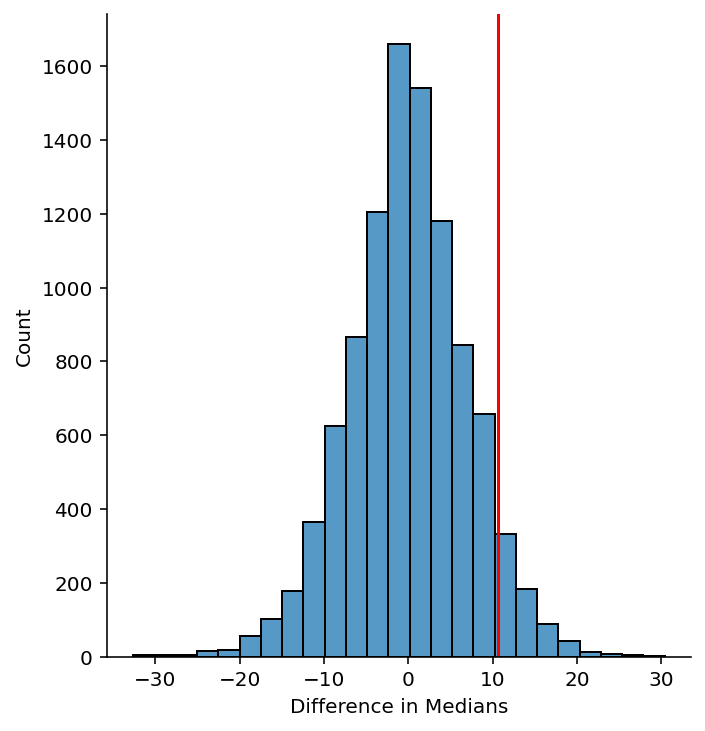

In [15]:
p=sns.displot(results, bins=25)
p.set(xlabel="Difference in Medians")
plt.axvline(d_obs, color="red")

### We will calculate a two-tailed p-value using our results. For that, we need to calculate how many simulations gave a result as extreme as our initial difference, in BOTH directions.

### 10. Calculate the value that is as extreme as your initial difference in the other direction, and save this value as the variable `other_limit`.
You first need to calculate the distance between the initial difference in median and the center of your null distribution, and then calculate the value on the other side of the center of the null distribution that would be at the same distance.

*HINT: If the null distribution is centered around zero, the opposite value would just have the reverse sign.*

In [16]:
other_limit=-(d_obs)

### 11. Reproduce the histogram, this time adding another line representing `other_limit`. The two lines should be symmetric around the center of the null distribution.

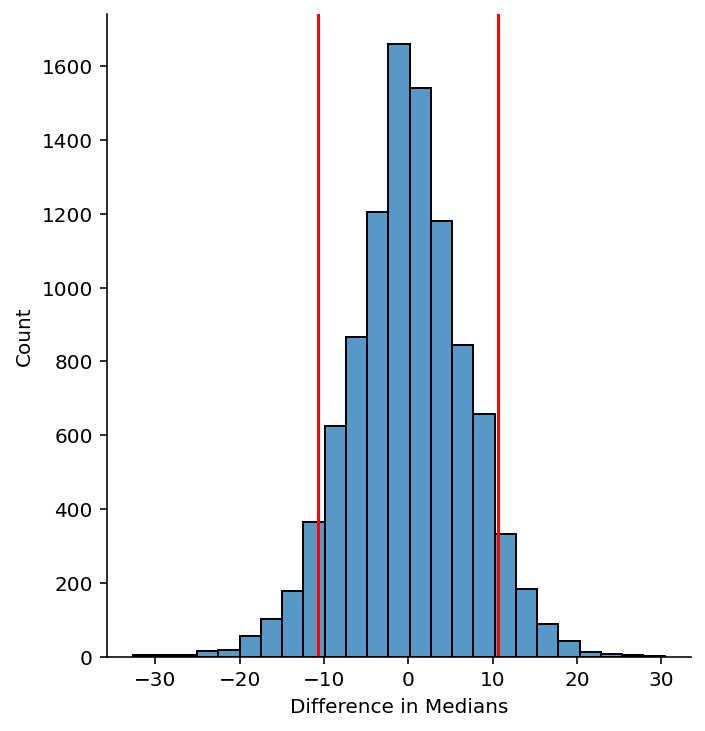

In [17]:
p=sns.displot(results, bins=25)
plt.axvline(d_obs, color="red")
plt.axvline(other_limit, color="red")
p.set(xlabel="Difference in Medians")

### 12. Count how many simulations gave a result at least as extreme as the initial observed difference in medians.

In [18]:
resultsarr=np.array(results)

extreme = np.sum(resultsarr >= d_obs) + np.sum(resultsarr <= other_limit)
extreme

1213

### 13. By dividing this number by the total number of simulations, you can obtain the 2-tailed p-value. Calculate this.

In [19]:
extreme/10000

0.1213

### 14. What can you conclude about the effect of sleep deprivation on the performance of the visual task?

In [20]:
#Since the p-value came out to be around 0.1215, this is much higher than the standard threshold of significance of 0.05. This suggests that there is no significant effect of sleep deprivation on the performance of the visual task. 


### 15. What if you had done the same analysis using the mean? What 2-tailed p-value would we have obtained?
*Hint: Copy and paste your code from relevant earlier problems and make a few small changes.* 

In [21]:
results2=np.zeros(10000)
for i in range(10000):
    p_sleep=np.random.choice(population, 10)
    p_nosleep=np.random.choice(population, 12)
    p_differenceMean=np.mean(p_sleep)-np.mean(p_nosleep)
    results2[i]=p_differenceMean

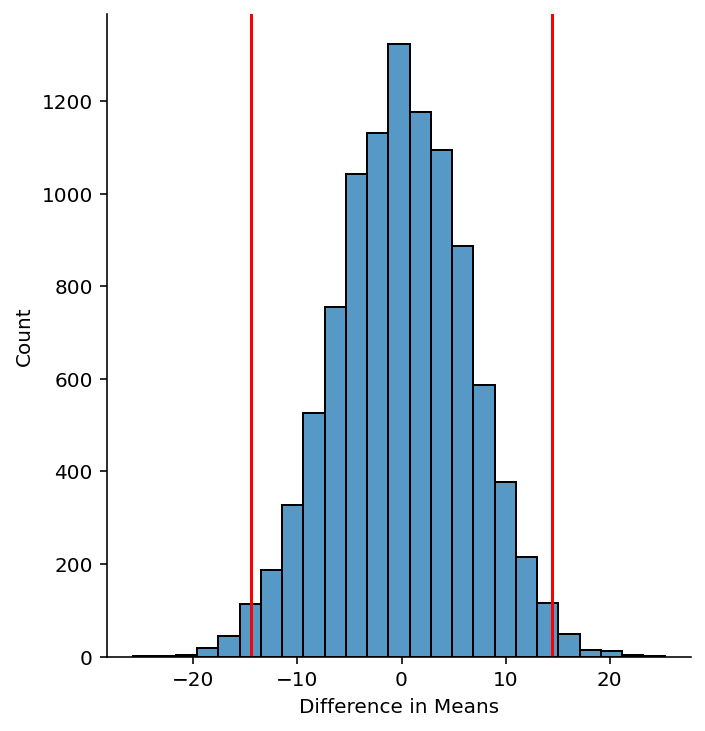

In [22]:
differenceMean=np.mean(group_sleep)-np.mean(group_nosleep)
other_limit2=-(differenceMean)

p=sns.displot(data=results2, bins=25)
plt.axvline(differenceMean, color="red")
plt.axvline(other_limit2, color="red")
p.set(xlabel="Difference in Means")

In [23]:
results2arr=np.array(results2)

extreme2 = np.sum(results2arr >= differenceMean) + np.sum(results2arr <= other_limit2)
extreme2

231

In [24]:
extreme2/10000

0.0231

### 16. Would you have drawn the same conclusion using the mean instead of the median?

In [25]:
#I would not have drawn the same conclusion using the mean as the median. Using the mean, I would've drawn the conclusion that sleep deprivation does indeed have a significant effect on the performance. 

### 17. Why do you think you received the same or different result using mean and median for this study?

In [25]:
#I think I received the different result using mean and median for this study because looking at the data, there are many more large values for the sleep group and very few negative numbers, skewing the mean towards the positive (the median is not affected as much by this large range of numbers). The no sleep group has many more negative numbers and not as many large positive numbers, skewing the mean towards the left. This skewing makes the difference in means much larger and more likely to be a signficant difference. The medians for these two groups are much closer and are more resistant to skewing.

[Text(0.5, 0, 'Improvement in Performance Scores for No Sleep Group')]

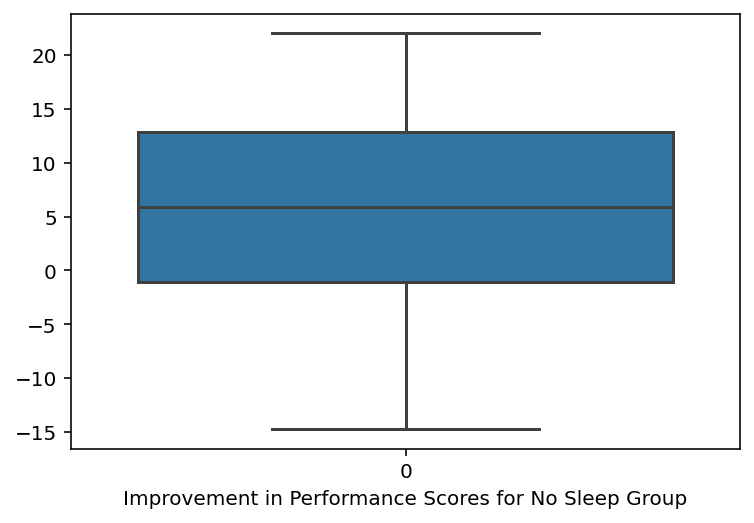

In [26]:
p=sns.boxplot(data=group_nosleep)
p.set(xlabel="Improvement in Performance Scores for No Sleep Group")

[Text(0.5, 0, 'Improvement in Performance Scores for Sleep Group')]

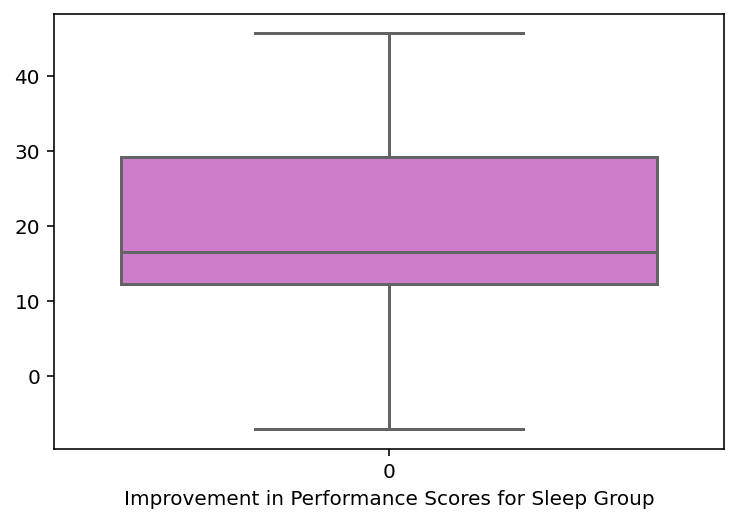

In [27]:
p=sns.boxplot(data=group_sleep, color="orchid")
p.set(xlabel="Improvement in Performance Scores for Sleep Group")

In [28]:
#Using the boxplots are a good way of looking how the two datasets can differ. Swarmplots are also alright. If a student is lost with this data, I'd ask them to visualize the data and tell me what they notice about the two datasets. 

## **Back to Confidence Intervals**

We would like to know the confidence interval of the effect size (difference in median improvement score the researchers obtained originally). For that, we need to run another simulation in which the groups are not pooled into a common population. Here, the goal is to quantify the uncertainty associated with the observed result, not to test a null hypothesis.

A single simulation would be:
* Draw a bootstrap sample from each group
* Calculate the difference in medians from those bootstrap samples
* Store the difference you obtained
Repeat that 10,000 times
Calculate the 99% confidence intervals of your results

### 18. Run the simulations and calculate the 99% confidence interval for the difference the researchers obtained originally.

In [26]:
results=np.zeros(10)
for i in range(10):
    p_sleep=np.random.choice(group_sleep, len(group_sleep))
    p_nosleep = np.random.choice(group_nosleep, len(group_nosleep))
    results[i]=np.median(p_sleep)-np.median(p_nosleep)
results

array([ 9.  , -1.15, 10.25,  8.4 ,  7.9 , 24.1 ,  6.35,  7.8 , 11.4 ,
        6.75])

In [27]:
results=np.zeros(10000)
for i in range(10000):
    p_sleep=np.random.choice(group_sleep, len(group_sleep))
    p_nosleep = np.random.choice(group_nosleep, len(group_nosleep))
    results[i]=np.median(p_sleep)-np.median(p_nosleep)

In [28]:
results.sort()
Mlower=results[49]
Mupper=results[9949]

lowerbound=2*d_obs - Mupper
upperbound=2*d_obs - Mlower
print(lowerbound,upperbound)

-12.7 27.35


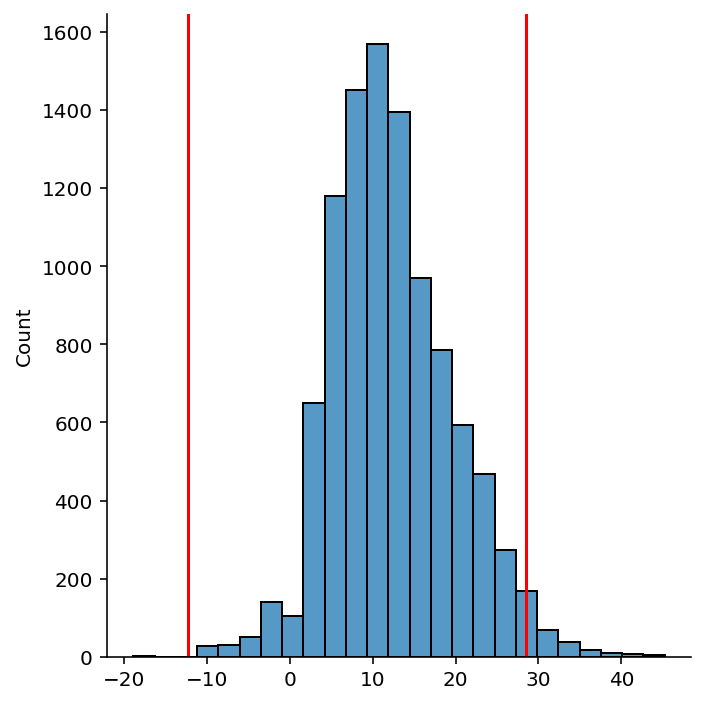

In [32]:
p=sns.displot(results, bins=25)
plt.axvline(lowerbound, color="red")
plt.axvline(upperbound, color="red")

### 19. What can you conclude?

In [33]:
#Since the 99% confidence interval includes 0, we cannot say the populations are significantly different, and therefore sleep deprivation doesn't seem to have a signficant effect on performance scores. A value of 0 inside the CI supports failing to reject the null hypothesis, as we have some evidence that the null might be true.